## Final Project Submission

Please fill out:
* Student name: Diana Byegon
* Student pace: Part Time
* Scheduled project review date/time: 3-Feb-2025
* Instructor name: Mildred Jepkosgei
* Blog post URL:


# Risk Assessment for Strategic Aircraft Fleet Expansion.

#  1. Business Understanding


### 1.1 Business Problem

Our company is expanding in to new industries to diversify its portfolio. Specifically, the company is interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. I am tasked with determining which aircraft are the lowest risk for the company to start this new business endeavor. I shall then translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### 1.2 Problem Statement

Our company is entering the aviation industry without prior experience in aircraft safety risks, creating potential operational and financial exposure. The challenge is to identify the safest aircraft types and manufacturers to inform risk-conscious fleet acquisition decisions.

### 1.3 Business Objective

Analyze historical aviation accident data to identify the lowest-risk aircraft and deliver three actionable recommendations to guide fleet acquisition decisions.

### 1.4 Business Questions

(i) Which aircraft models demonstrate the lowest accident frequency?

(ii) Which aircraft models have the lowest fatality rates per accident?

(iii) How have aviation accident rates changed over time?

## 2. Data Understanding

### 2.1 Data Source
This dataset contains information about aviation accidents scraped from the Aviation Safety Network (ASN).

### 2.2 Data Overview
This dataset includes information on:
Date: The date of the crash,
Type: Aircraft model/type,
Registration: Aircraft registration code,
Operator: Airline or organization operating the aircraft,
fat: Number of fatalities reported in the crash (passengers + crew),
Location: Where the crash occurred, and 
dmg: Damage severity.

We load the data to understand its structure, quality and content.


In [10]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Load the dataset
df = pd.read_csv("data/flight.csv", index_col=0)

In [15]:
# Preview of the dataset
df.head()

,acc.date,type,reg,operator,fat,location,dmg
0,3-Jan-22,British Aerospace 4121 Jetstream 41,ZS-NRJ,SA Airlink,0,near Venetia Mine Airport,sub
1,4-Jan-22,British Aerospace 3101 Jetstream 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0,Roatán-Juan Manuel Gálvez International Airpor...,sub
2,5-Jan-22,Boeing 737-4H6,EP-CAP,Caspian Airlines,0,Isfahan-Shahid Beheshti Airport (IFN),sub
3,8-Jan-22,Tupolev Tu-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0,Hangzhou Xiaoshan International Airport (HGH),w/o
4,12-Jan-22,Beechcraft 200 Super King Air,NaN,private,0,"Machakilha, Toledo District, Grahem Creek area",w/o


In [16]:
# Summary of the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 1249
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   acc.date  2500 non-null   object
 1   type      2500 non-null   object
 2   reg       2408 non-null   object
 3   operator  2486 non-null   object
 4   fat       2488 non-null   object
 5   location  2500 non-null   object
 6   dmg       2500 non-null   object
dtypes: object(7)
memory usage: 156.2+ KB


In [30]:
# Shape of the dataset
df.shape

(2398, 9)

In [39]:
# Column names
df.columns

Index(['acc.date', 'type', 'reg', 'operator', 'fat', 'location', 'dmg'], dtype='object')

In [41]:
# Checking Missing values
df.isnull().sum()


acc.date     0
type         0
reg         92
operator    14
fat         12
location     0
dmg          0
dtype: int64

#### 2.2.1 Initial Observation
(i) Several Columns related to registration, operator and fatalities are missing values.

(ii) The dataset spans multiple decades, which may introduce inconsistencies in reporting formats.



## 3. Data Preparation

The following steps were taken to ensure accuracy in data analysis:

(i) Standardize aircraft type names

(ii) Handled missing values.

(iii) Converted acc.date fields to datetime format.

(iv) Converting fatalities field from object to numeric.

(v) creating year column

In [69]:
#Standardizing Aircraft Type Names

df.loc[:, 'type'] = df['type'].str.upper().str.strip()
df



,acc.date,type,reg,operator,fat,location,dmg,manufacturer,Year
0,2022-01-03,BRITISH AEROSPACE 4121 JETSTREAM 41,ZS-NRJ,SA Airlink,0.0,near Venetia Mine Airport,sub,BRITISH,2022.0
1,2022-01-04,BRITISH AEROSPACE 3101 JETSTREAM 31,HR-AYY,LANHSA - Línea Aérea Nacional de Honduras S.A,0.0,Roatán-Juan Manuel Gálvez International Airpor...,sub,BRITISH,2022.0
2,2022-01-05,BOEING 737-4H6,EP-CAP,Caspian Airlines,0.0,Isfahan-Shahid Beheshti Airport (IFN),sub,BOEING,2022.0
3,2022-01-08,TUPOLEV TU-204-100C,RA-64032,"Cainiao, opb Aviastar-TU",0.0,Hangzhou Xiaoshan International Airport (HGH),w/o,TUPOLEV,2022.0
5,2022-01-16,AIRBUS A320-214 (WL),JA24MC,Star Flyer,0.0,near Okayama City,non,AIRBUS,2022.0
...,...,...,...,...,...,...,...,...,...
1245,2018-12-20,CESSNA 560 CITATION V,N188CW,Chen Aircrafts LLC,4.0,"2 km NE of Atlanta-Fulton County Airport, GA (...",w/o,CESSNA,2018.0
1246,2018-12-22,PZL-MIELEC M28 SKYTRUCK,GNB-96107,Guardia Nacional Bolivariana de Venezuela - GNBV,0.0,Kamarata Airport (KTV),sub,PZL-MIELEC,2018.0
1247,2018-12-24,ANTONOV AN-26B,9T-TAB,Air Force of the Democratic Republic of the Congo,0.0,Beni Airport (BNC),w/o,ANTONOV,2018.0
1248,2018-12-31,BOEING 757-2B7 (WL),N938UW,American Airlines,0.0,"Charlotte-Douglas International Airport, NC (C...",sub,BOEING,2018.0


In [72]:
# Converting acc.date to datetime format

df.loc[:, 'acc.date'] = pd.to_datetime(df['acc.date'], errors='coerce')
df.loc[:, 'acc.date']



0      2022-01-03
1      2022-01-04
2      2022-01-05
3      2022-01-08
5      2022-01-16
          ...    
1245   2018-12-20
1246   2018-12-22
1247   2018-12-24
1248   2018-12-31
1249          NaT
Name: acc.date, Length: 2360, dtype: datetime64[ns]

In [73]:
#Converting fatalities to numerics
df.loc[:, 'fat'] = pd.to_numeric(df['fat'], errors='coerce')
df.loc[:, 'fat']


0       0.0
1       0.0
2       0.0
3       0.0
5       0.0
       ... 
1245    4.0
1246    0.0
1247    0.0
1248    0.0
1249    0.0
Name: fat, Length: 2360, dtype: float64

In [74]:
# Dropping rows missing critical fields

df = df.dropna(subset=['reg', 'operator', 'fat'])
df.shape


(2360, 9)

In [60]:
#creating year column
df.loc[:, 'Year'] = pd.to_datetime(df['acc.date']).dt.year
df.loc[:, 'Year']


0       2022.0
1       2022.0
2       2022.0
3       2022.0
5       2022.0
         ...  
1245    2018.0
1246    2018.0
1247    2018.0
1248    2018.0
1249       NaN
Name: Year, Length: 2360, dtype: float64

In [59]:
# Create manufacturer column 
df.loc[:, 'manufacturer'] = df['type'].str.split().str[0]





Rows missing essential fields such as registration, operator and fatalities were removed.

## 4. Data Analysis

### 4.1 Aircrafts with Lowest Accident Frequency

In [38]:
# Aircrafts with the lowest number of accidents
lowest_accident_aircrafts = df['type'].value_counts().sort_values().head(10)
lowest_accident_aircrafts


SHORTS SC.7 SKYVAN 3M-400                        2
EMBRAER EMB-545 LEGACY 450                       2
DORNIER 228-201                                  2
BOEING 757-2B7 (WL)                              2
BOEING 737-8K2 (WL)                              2
BOEING 737-73S (WL)                              2
EMBRAER ERJ-170SE                                2
RAYTHEON 390 PREMIER I                           2
IRMA/PILATUS BRITTEN-NORMAN BN-2A-26 ISLANDER    2
BOEING 777-212ER                                 2
Name: type, dtype: int64

### 4.2 Aircrafts with lowest fatality rate

In [39]:
# Top 10 low safety risk aircrafts

fatality_rate_per_aircraft = ( df.groupby('type')['fat'] .mean() .sort_values() .head(10))
fatality_rate_per_aircraft


type
BOEING 767-3S2FER                              0.0
CANADAIR CL-600-2B19 REGIONAL JET CRJ-200LR    0.0
CANADAIR CL-600-2B19 REGIONAL JET CRJ-200ER    0.0
LEARJET 45                                     0.0
CANADAIR CL-600-2B16 CHALLENGER 601            0.0
CANADAIR CL-600-2A12 CHALLENGER 601            0.0
CANADAIR CL-600-1A11 CHALLENGER 600            0.0
CANADAIR CL-600 CHALLENGER 600                 0.0
LEARJET 55                                     0.0
BRITTEN-NORMAN BN-2B-26 ISLANDER               0.0
Name: fat, dtype: float64

### 4.3 Aircraft Accident Trends Over Time


In [40]:
yearly_accidents = df['Year'].value_counts().sort_index()
yearly_accidents



2018.0    540
2019.0    556
2020.0    438
2021.0    406
2022.0    416
Name: Year, dtype: int64

### 4.4 Manufacurers by Accident Count

In [41]:
manufacturer_counts = df['manufacturer'].value_counts().head(10)
manufacturer_counts



BOEING        412
CESSNA        358
AIRBUS        228
ANTONOV       184
BEECHCRAFT    170
DE            134
EMBRAER        98
LEARJET        70
GULFSTREAM     60
BOMBARDIER     60
Name: manufacturer, dtype: int64

In [ ]:
## 5. Data Visualization

### 5.1 Aircrafts with Lowest Accident Frequency

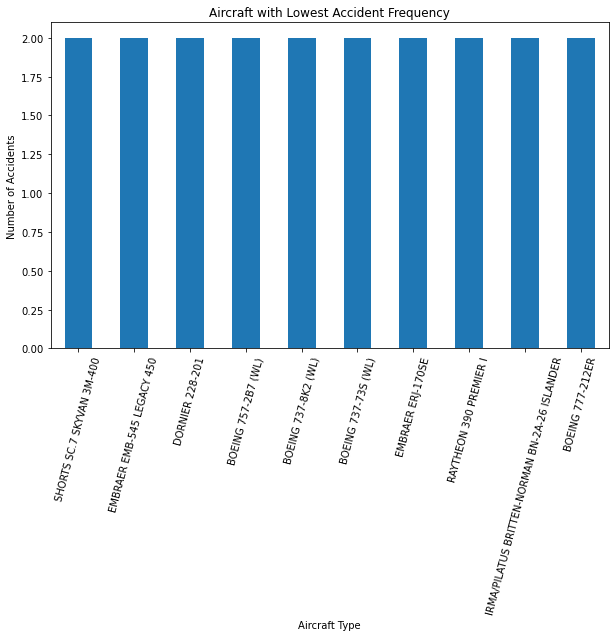

In [42]:
lowest_accident_aircrafts.plot(kind='bar', figsize=(10,6))
plt.title("Aircraft with Lowest Accident Frequency")
plt.ylabel("Number of Accidents")
plt.xlabel("Aircraft Type")
plt.xticks(rotation=75)
plt.show()


### 5.2 Aircrafts with Lowest Safety Risk

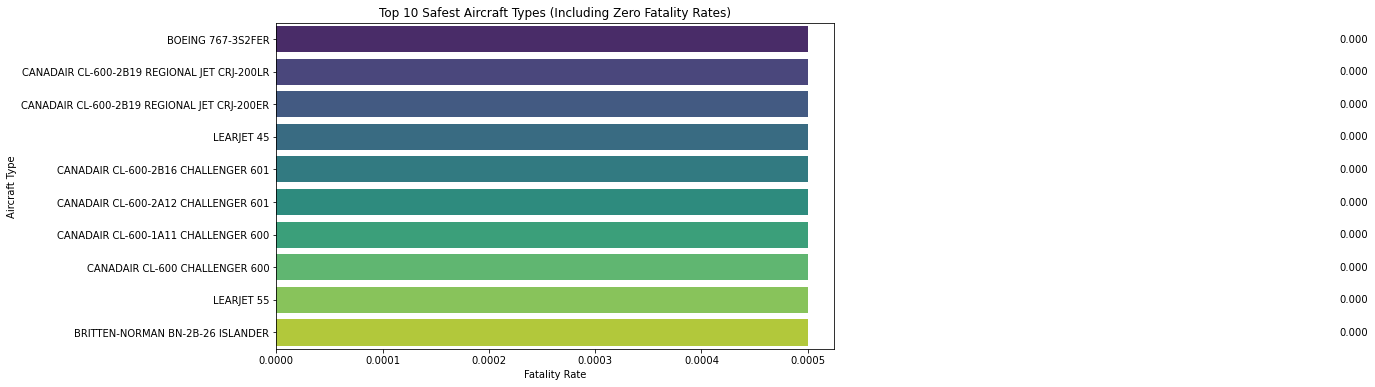

In [65]:
# Top 10 safest aircraft categories
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fatality_rate_per_aircraft = (df.groupby('type')['fat']  .mean()  .sort_values()  .head(10))


plot_values = fatality_rate_per_aircraft.replace(0, 0.0005)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=plot_values.values,
    y=plot_values.index,
    palette="viridis"
)

# Add value labels (true values)
for i, value in enumerate(fatality_rate_per_aircraft.values):
    ax.text(plot_values.values[i] + 0.0005, i, f"{value:.3f}", va='center')

plt.title("Top 10 Safest Aircraft Types (Including Zero Fatality Rates)")
plt.xlabel("Fatality Rate")
plt.ylabel("Aircraft Type")
plt.show()



### 5.3 Trend of aircraft accidents over time

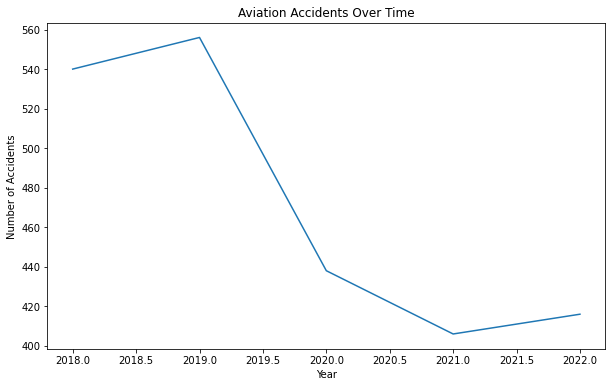

In [64]:
yearly_accidents = df['Year'].value_counts().sort_index()

yearly_accidents.plot(figsize=(10,6))
plt.title("Aviation Accidents Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.show()


### 5.4 Top 10 Manufacturers by Accident

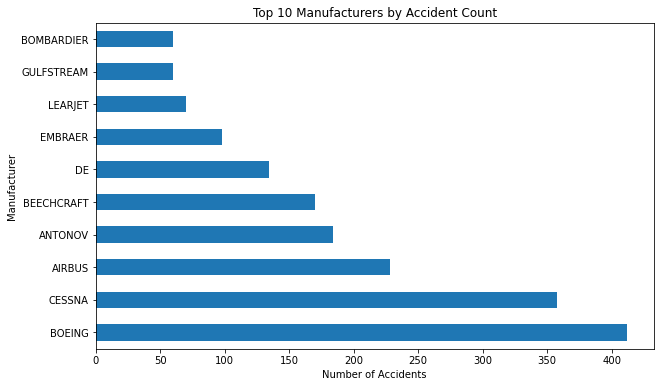

In [44]:
manufacturer_counts.plot(kind='barh', figsize=(10,6))
plt.title("Top 10 Manufacturers by Accident Count")
plt.xlabel("Number of Accidents")
plt.ylabel("Manufacturer")
plt.show()


## 6. Insights

(i) Several aircraft models, particularly from Bombardier/Canadair and Learjet, demonstrate both low accident frequency and zero or near-zero fatality rates, indicating strong safety performance.

(ii)Manufacturers such as Bombardier, Learjet, and Boeing appear frequently among the lowest-risk aircraft categories. This suggests consistent design reliability and effective safety standards across their fleet.

(iii) Accident frequency has steadily declined over time, indicating significant improvements in aviation safety driven by advances in aircraft technology, enhanced regulatory oversight, and better pilot training.

## 7. Recommendation

(i) Prioritize acquisition of low-risk aircraft models from manufacturers such as Bombardier/Canadair and Learjet, which consistently demonstrate low accident and fatality rates.


(ii) Incorporate safety performance into procurement criteria. Future aircraft procurement decisions should explicitly include historical accident frequency and fatality rates as key evaluation metrics alongside cost and performance.


(iii) Sustain and strengthen safety regulations and training programs.The downward trend in accident frequency highlights the effectiveness of existing safety measures. Continued investment in regulatory enforcement, pilot training, and maintenance standards is essential to maintain and further improve safety outcomes.

### 8 Next Steps

Implementing these recommendations will help the company enter the aviation industry with a safer fleet, reduced liability exposure, and stronger operational performance.